In [58]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
stock = '^N225'
data = yf.download(stock,'2010-01-01','2023-05-14')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,10609.339844,10694.490234,10608.139648,10654.790039,10654.790039,104400000
2010-01-05,10719.440430,10791.040039,10655.570312,10681.830078,10681.830078,166200000
2010-01-06,10709.549805,10768.610352,10661.169922,10731.450195,10731.450195,181800000
2010-01-07,10742.750000,10774.000000,10636.669922,10681.660156,10681.660156,182600000
2010-01-08,10743.299805,10816.450195,10677.559570,10798.320312,10798.320312,211800000


In [73]:
price = data['Close']
price

Date
2010-01-04    10654.790039
2010-01-05    10681.830078
2010-01-06    10731.450195
2010-01-07    10681.660156
2010-01-08    10798.320312
                  ...     
2023-05-08    28949.880859
2023-05-09    29242.820312
2023-05-10    29122.179688
2023-05-11    29126.720703
2023-05-12    29388.300781
Name: Close, Length: 3266, dtype: float64

<Axes: xlabel='Date'>

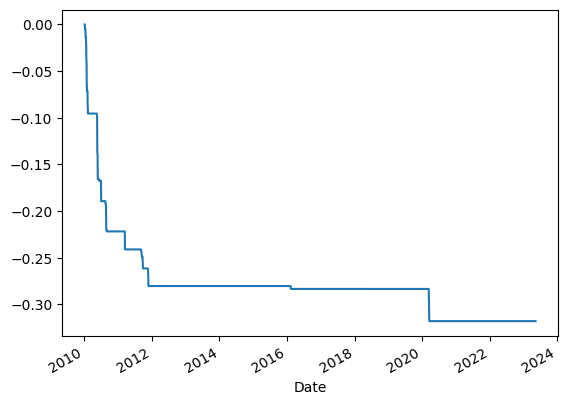

In [61]:
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()


In [62]:
print(f"Maximum Drawdown is: {mdd[-1]*100} %")

Maximum Drawdown is: -31.79889650850192 %


In [63]:
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        ,  0.00253783,  0.00464528, ..., -0.00412548,
        0.00015593,  0.00898076])

In [64]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([1.        , 1.00253783, 1.0071949 , ..., 2.73324764, 2.73367383,
       2.7582243 ])

In [65]:
print(f"Cumulative return is {cumulative_ret[-1]*100}%")

Cumulative return is 275.82242985086447%


In [66]:
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31   -0.173388
2012-12-31    0.229420
2013-12-31    0.567198
2014-12-31    0.071170
2015-12-31    0.090709
2016-12-31    0.004238
2017-12-31    0.190986
2018-12-31   -0.120807
2019-12-31    0.181958
2020-12-31    0.160105
2021-12-31    0.049101
2022-12-31   -0.093680
2023-12-31    0.126226
Freq: A-DEC, Name: Close, dtype: float64

In [67]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28   -0.007061
2010-03-31    0.095191
2010-04-30   -0.002934
2010-05-31   -0.116546
                ...   
2023-01-31    0.047236
2023-02-28    0.004335
2023-03-31    0.021713
2023-04-30    0.029063
2023-05-31    0.018431
Freq: M, Name: Close, Length: 161, dtype: float64

In [68]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is {avg_yearly_return*100}%")

Average yearly return is 9.87105307772834%


In [69]:
sharpe_ratio = (avg_yearly_return - 0.07)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 5.772065574335286


In [70]:
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-02-28   -0.007061
2010-04-30   -0.002934
2010-05-31   -0.116546
2010-06-30   -0.039520
2010-08-31   -0.074784
                ...   
2022-02-28   -0.017597
2022-04-30   -0.034992
2022-06-30   -0.032506
2022-09-30   -0.076689
2022-12-31   -0.067020
Name: Close, Length: 62, dtype: float64

In [71]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.07)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 8.355839985572016
